# Project on German credit database

**Project's issue**: 

The main idea is to challenge the traditional methods of classification and prediction of default with the
machine-learning methods already used in other financial intermediation institutions, especially in
startups. The comparison of the methods will be based on the usual performance's metrics. Logistic regression outcomes will be used as benchmark 
    
This project consists in building the best possible score function on a classic Machine-learning
database: the German Credit Data database.
This database has the distinction of being very small: it represents 1000 loans, 20 variables such as
marital status, age, number of credits to date, the amount requested. One of the advantages of this
database is that it contains the same type of information used in default risk assessment in most retail
banking establishments. However, the defect observation rate is very high (around 30%).

the Databasae can be find out using the following link :  http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)


# Packages

In [221]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from collections import defaultdict
from sklearn import metrics,tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler,LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV
from sklearn.feature_selection import SelectKBest,chi2,RFE,f_classif
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc

# Load dataset 

In [423]:
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
file = r'D:\sklearn\german.data'
df = pd.read_csv(file,names = names, delimiter = ' ')
df.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [424]:
df.set_index(np.arange(1,1001,step =1),inplace = True)

In [425]:
# classification variable transformation -> 1 = 'bad' credit; 0 = 'good' credit
df.classification.replace([1,2], [0,1], inplace=True)
# Nombre de 'good' credits  and 'bad credits
df.classification.value_counts()

0    700
1    300
Name: classification, dtype: int64

In [426]:
print("Data set shape", df.shape)

Data set shape (1000, 21)


# Statistical analysis

In [197]:
df.describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [191]:
df.query('classification == 0').describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.0
mean,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714,0.0
std,11.079564,2401.472278,1.128078,1.108373,11.381145,0.584721,0.362844,0.0
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.0
25%,12.000000,1375.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.0
50%,18.000000,2244.000000,3.000000,3.000000,34.000000,1.000000,1.000000,0.0
75%,24.000000,3634.750000,4.000000,4.000000,42.250000,2.000000,1.000000,0.0
max,60.000000,15857.000000,4.000000,4.000000,75.000000,4.000000,2.000000,0.0


In [192]:
df.query('classification == 1').describe()

,duration,creditamount,installmentrate,residencesince,age,existingcredits,peopleliable,classification
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.0
mean,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333,1.0
std,13.282639,3535.818955,1.088395,1.094605,11.222379,0.559702,0.360911,0.0
min,6.000000,433.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.0
25%,12.000000,1352.500000,2.000000,2.000000,25.000000,1.000000,1.000000,1.0
50%,24.000000,2574.500000,4.000000,3.000000,31.000000,1.000000,1.000000,1.0
75%,36.000000,5141.500000,4.000000,4.000000,40.000000,2.000000,1.000000,1.0
max,72.000000,18424.000000,4.000000,4.000000,74.000000,4.000000,2.000000,1.0


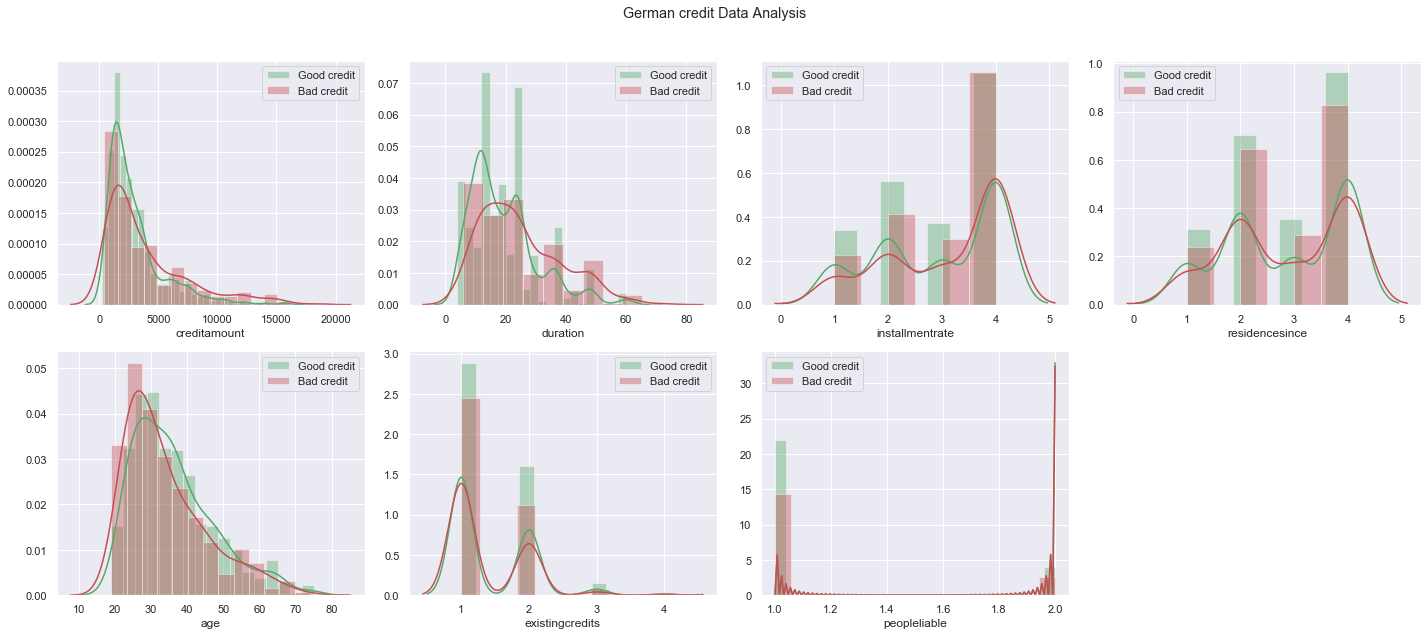

In [177]:
#Feature representation

fig = plt.figure(figsize = (20, 25))
j = 0
for i in ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable']:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['classification']==0], color='g', label = 'Good credit')
    sns.distplot(df[i][df['classification']==1], color='r', label = 'Bad credit')
    plt.legend(loc='best')
fig.suptitle('German credit Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Data cleaning 

In [417]:
#numerical labels
numvars = ['creditamount', 'duration', 'installmentrate', 'residencesince', 'age', 
           'existingcredits', 'peopleliable']

#categorical labels 
catvars = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince',
           'statussex', 'otherdebtors', 'property', 'otherinstallmentplans', 'housing', 'job', 
           'telephone', 'foreignworker'] 

In [427]:
#standardization of num labels
numdata_std = pd.DataFrame(StandardScaler().fit_transform(df[numvars]))

In [199]:
numdata_std.describe().rename(columns={0: "creditamount", 1: "duration" , 2: "installmentrate",
                                      3: "residencesince", 4: "age", 
                                       5: "existingcredits", 6: "peopleliable"})

,creditamount,duration,installmentrate,residencesince,age,existingcredits,peopleliable
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.771561e-17,1.332268e-16,1.163965e-16,-3.117506e-16,3.597123e-17,-5.928591e-17,-2.887690e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.070865e+00,-1.402415e+00,-1.764514e+00,-1.672459e+00,-1.455261e+00,-7.049260e-01,-4.282896e-01
25%,-6.754833e-01,-7.386675e-01,-8.701833e-01,-7.659773e-01,-7.516417e-01,-7.049260e-01,-4.282896e-01
50%,-3.373443e-01,-2.408572e-01,2.414692e-02,1.405047e-01,-2.239269e-01,-7.049260e-01,-4.282896e-01
75%,2.484620e-01,2.569531e-01,9.184772e-01,1.046987e+00,5.676451e-01,1.027079e+00,-4.282896e-01
max,5.370789e+00,4.239436e+00,9.184772e-01,1.046987e+00,3.470076e+00,4.491089e+00,2.334869e+00


In [428]:
#categorical codification
d = defaultdict(LabelEncoder)
lecatdf = df[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", df[catvars[x]].unique())
    print(catvars[x],": ", lecatdf[catvars[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
employmentsince :  [4 2 3 0 1]
statussex :  ['A93' 'A92' 'A91' 'A94']
statussex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


In [429]:
#One hot encoding, num_var turned into binary variable
dummyvars = pd.get_dummies(df[catvars])

In [430]:
#clean databse 
data_clean = pd.concat([df[numvars], dummyvars], axis = 1)
print("German credit clean dataset", data_clean.head())
print("Clean dataset set shape", data_clean.shape )

German credit clean dataset    creditamount  duration  installmentrate  residencesince  age  \
1          1169         6                4               4   67   
2          5951        48                2               2   22   
3          2096        12                2               3   49   
4          7882        42                2               4   45   
5          4870        24                3               4   53   

   existingcredits  peopleliable  classification  existingchecking_A11  \
1                2             1               0                     1   
2                1             1               1                     0   
3                1             2               0                     0   
4                1             2               0                     1   
5                2             2               1                     1   

   existingchecking_A12  ...  housing_A152  housing_A153  job_A171  job_A172  \
1                     0  ...             1  

In [250]:
data_clean.to_csv(r'D:\02_capston_project\data_clean.csv', index=True)

##  Features selections based on statistical's test
Features selection based on Pearson correlation , Chi2 and Anova Fvalue

In [200]:
#Features Default selection
feature_name = data_clean.columns.drop('classification').tolist()
x = data_clean.drop('classification',axis=1)
y = data_clean.classification

In [201]:
#Preprocessing using Pearson Correlation
cor = data_clean.corr()
#Correlation with output variable
cor_target = abs(cor["classification"])
print(cor_target.describe())


count    62.000000
mean      0.090822
std       0.133207
min       0.000751
25%       0.030075
50%       0.070521
75%       0.106791
max       1.000000
Name: classification, dtype: float64


In [202]:
#Number of highly correlated features with the target value
num_feats = cor_target[cor_target>0.1]
print("Number of highly correlated features with the target value ", len(num_feats))

Number of highly correlated features with the target value  17


In [208]:
num_feats = 15

In [46]:
from scipy import stats
def cor_selector(X, y,num_feats):
    cor_list = []
    cor_pvalue = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = stats.pearsonr(X[i], y)[0]
        pvalue = stats.pearsonr(X[i], y)[1]
        cor_list.append(cor)
        cor_pvalue.append(pvalue)
    # Get score and pvalue : replace Nan Value by 0 
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_pvalue = [0 if np.isnan(i) else i for i in cor_pvalue]
    # Get feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection :  False for not select, True for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature,cor_list,cor_pvalue

def chi_selector(X, y,num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    # Get score pvalue and selected features : feature selection :  False for not select, True for select
    chi_support = chi_selector.get_support()
    chi_score = chi_selector.scores_
    chi_pvalue = chi_selector.pvalues_
    chi_feature = X.loc[:,chi_support].columns.tolist()
    return chi_support, chi_feature, chi_score, chi_pvalue
    
def fvalue_selector(x, y,num_feats):
    fvalue_selector = SelectKBest(f_classif, k=num_feats)
    fvalue_selector.fit_transform(x, y)
    # Get score pvalue and selected features : feature selection :  False  for not select, True for select
    fvalue_support= fvalue_selector.get_support()
    fvalue_score = fvalue_selector.scores_
    fvalue_pvalue = fvalue_selector.pvalues_
    fvalue_feature = x.loc[:,fvalue_support].columns.tolist()
    return fvalue_support, fvalue_feature, fvalue_score, fvalue_pvalue

In [209]:
#Selection functions execution
cor_support, cor_feature, cor_score, cor_pvalue = cor_selector(x, y,num_feats)
chi_support, chi_feature, chi_score, chi_pvalue = chi_selector(x, y,num_feats)
fvalue_support, fvalue_feature, fvalue_score, fvalue_pvalue=  fvalue_selector(x, y,num_feats)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 
                                     'Chi-2':chi_support,'Anova Fvalue' :fvalue_support })

feature_score_df = pd.DataFrame({'Feature':feature_name, 'Pearson_score':cor_score, 'Pearson_pvalue':cor_pvalue,  
                                 'Chi-2_score':chi_score, 'Chi-2_pvalue':chi_pvalue,
                                 'Anova Fvalue_score' :fvalue_score, 'Anova Fvalue_pvalue' :fvalue_pvalue })

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_score_df['Total'] = feature_selection_df['Total']
 
# display features selection
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_score_df = feature_score_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_score_df.index = range(1, len(feature_score_df)+1)

In [213]:
# display features selection scores and pvalues
feature_score_df.head(20)

,Feature,Pearson_score,Pearson_pvalue,Chi-2_score,Chi-2_pvalue,Anova Fvalue_score,Anova Fvalue_pvalue,Total
1,savings_A65,-0.129238,4.150378e-05,13.645850,2.207287e-04,16.952122,4.150378e-05,3
2,savings_A61,0.161007,3.079155e-07,10.291479,1.336459e-03,26.559788,3.079155e-07,3
3,purpose_A43,-0.106922,7.074909e-04,8.231293,4.117420e-03,11.541432,7.074909e-04,3
4,property_A124,0.125750,6.679290e-05,13.377860,2.546120e-04,16.035010,6.679290e-05,3
5,property_A121,-0.119300,1.559643e-04,10.218845,1.390129e-03,14.408984,1.559643e-04,3
6,existingchecking_A14,-0.322436,1.260002e-25,63.002659,2.064277e-15,115.795509,1.260002e-25,3
7,existingchecking_A12,0.119581,1.504300e-04,10.453001,1.224504e-03,14.478021,1.504300e-04,3
8,existingchecking_A11,0.258333,1.038533e-16,48.450469,3.387373e-12,71.365363,1.038533e-16,3
9,credithistory_A34,-0.181713,7.151419e-09,23.344872,1.354040e-06,34.078853,7.151419e-09,3
10,credithistory_A31,0.134448,1.992977e-05,17.190476,3.381273e-05,18.372157,1.992977e-05,3


In [214]:
# display features selection
feature_selection_df.head(20)

,Feature,Pearson,Chi-2,Anova Fvalue,Total
1,savings_A65,True,True,True,3
2,savings_A61,True,True,True,3
3,purpose_A43,True,True,True,3
4,property_A124,True,True,True,3
5,property_A121,True,True,True,3
6,existingchecking_A14,True,True,True,3
7,existingchecking_A12,True,True,True,3
8,existingchecking_A11,True,True,True,3
9,credithistory_A34,True,True,True,3
10,credithistory_A31,True,True,True,3


In [212]:
relevant_features = feature_selection_df[feature_selection_df.Total>1].Feature
print("Number of relevant features : ", len(relevant_features))
relevant_features

Number of relevant features :  15


1                    savings_A65
2                    savings_A61
3                    purpose_A43
4                  property_A124
5                  property_A121
6           existingchecking_A14
7           existingchecking_A12
8           existingchecking_A11
9              credithistory_A34
10             credithistory_A31
11             credithistory_A30
12    otherinstallmentplans_A143
13                  housing_A152
14                      duration
15                  creditamount
Name: Feature, dtype: object

In [129]:
#Analysis of relevant features correlation between themselves  
#we compare the correlation between features and remove one of two features that have a correlation higher than 0.8
plt.figure(figsize=(15,15))
cor = x[relevant_features].corr()
columns = np.full((cor.shape[0],), True, dtype=bool)
for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if abs(cor.iloc[i,j]) >= 0.8:
            if columns[j]:
                columns[j] = False
relevant_features = x[relevant_features].columns[columns]
print("Number of relevant features : ", len(relevant_features))
relevant_features=relevant_features.tolist()
relevant_features

Number of relevant features :  15


['savings_A65',
 'savings_A61',
 'purpose_A43',
 'property_A124',
 'property_A121',
 'existingchecking_A14',
 'existingchecking_A12',
 'existingchecking_A11',
 'credithistory_A34',
 'credithistory_A31',
 'credithistory_A30',
 'otherinstallmentplans_A143',
 'housing_A152',
 'duration',
 'creditamount']

<Figure size 1080x1080 with 0 Axes>

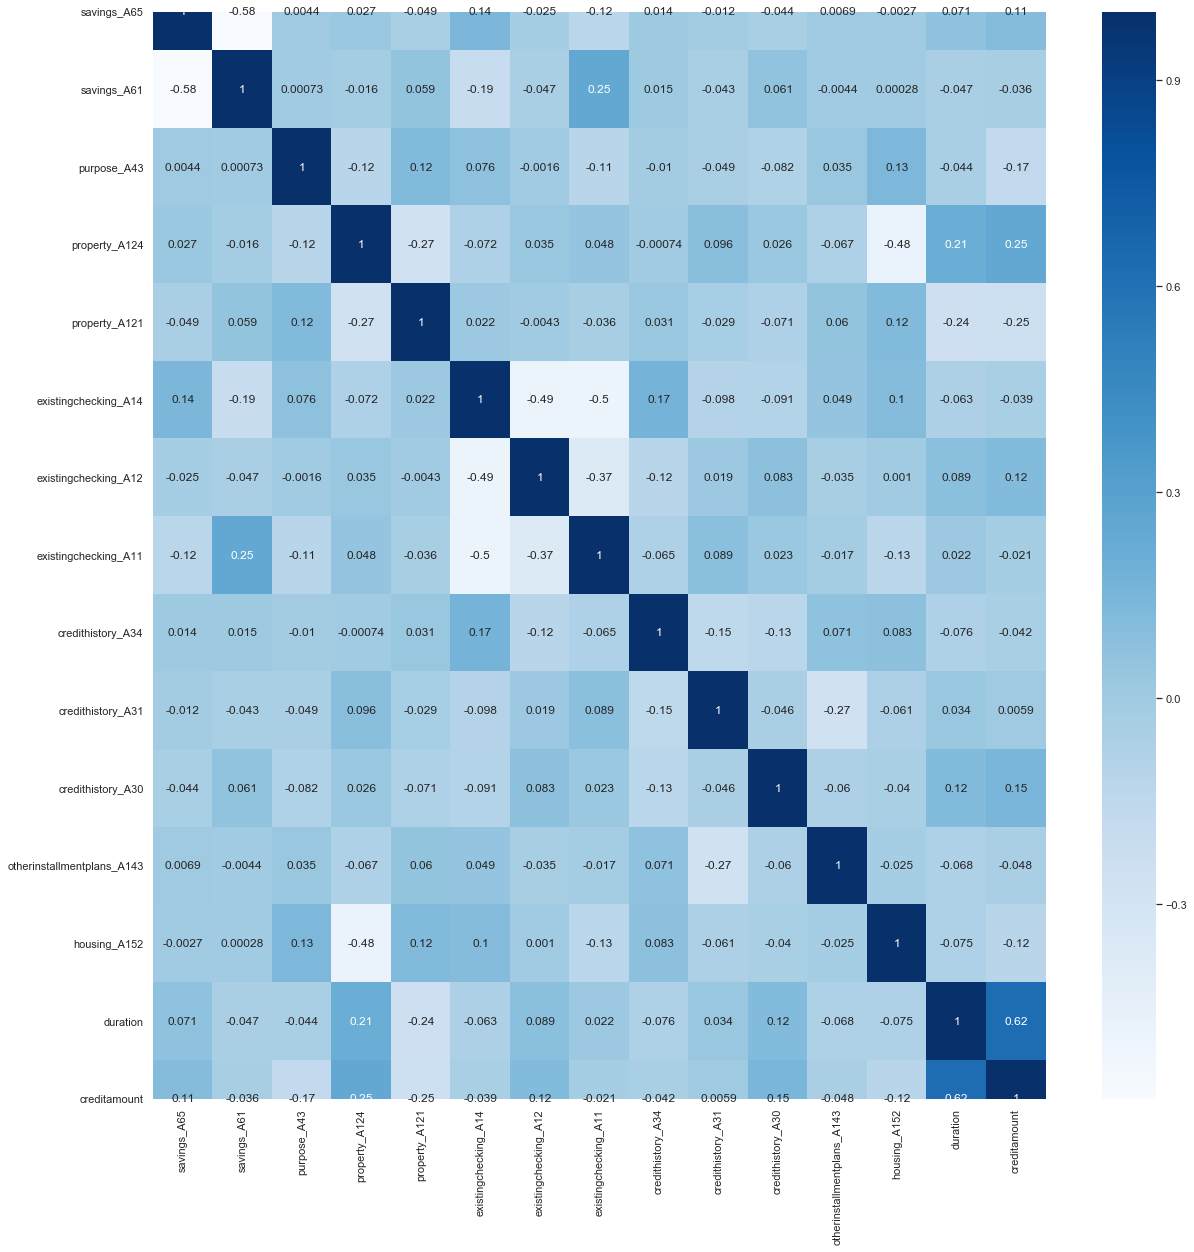

In [215]:
cor = x[relevant_features].corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [158]:
relevant_features = ['savings_A65',
 'savings_A61',
 'purpose_A43',
 'property_A124',
 'property_A121',
 'existingchecking_A14',
 'existingchecking_A12',
 'existingchecking_A11',
 'credithistory_A34',
 'credithistory_A31',
 'credithistory_A30',
 'otherinstallmentplans_A143',
 'housing_A152',
 'duration',
 'creditamount']

# Modelisation Part 

## Function

In [134]:
def modelfit(model,X_train,Y_train,X_test,Y_test,features,performCV=True,roc=False, printFeatureImportance=False):
    
    #Fitting the model on the data_set
    model.fit(X_train[features],Y_train)
        
    #Predict training and on the test set:
    y_pred1 = model.predict(X_train[features])
    predprob = model.predict_proba(X_train[features])[:,1]
    y_pred2 = model.predict(X_test[features])
    
    # Create and print confusion matrix    
    cfm = confusion_matrix(Y_train,y_pred1)
    cfm_test = confusion_matrix(Y_test,y_pred2)
    print("\nModel Confusion matrix on  train set ")
    print(cfm)
    
    print("\nModel Confusion matrix on  test set ")
    print(cfm_test)
    
    #Print model report:
    print("\nModel Report ")
    
    print("Accuracy on train set : %.4g" % metrics.accuracy_score(Y_train.values, y_pred1))
    print("Accuracy on test set : %.4g" % metrics.accuracy_score(Y_test.values, y_pred2))
    
    print("Precision on train set : %.4g" % metrics.precision_score(Y_train.values, y_pred1))
    print("Precision on test set : %.4g" % metrics.precision_score(Y_test.values, y_pred2)) 
    
    print("Recall on train set : %.4g" % metrics.recall_score(Y_train.values, y_pred1))
    print("Recall on test set : %.4g" % metrics.recall_score(Y_test.values, y_pred2)) 

    #Perform cross-validation: evaluate using 10-fold cross validation 
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    if performCV:
        print(" cross-validation: evaluate using 10-fold cross validation on the train set ")
        evaluation(model,X_train[features],Y_train,kfold)
    if roc: 
        compute_roc(y_test = Y_test, y_pred_test= y_pred2 ,y_train =Y_train, y_pred_train = y_pred1, plot=True)
          
    #Print Feature Importance:
    if printFeatureImportance:
        feature_importance(model,features,threshold = 0.02, selection=False) 

In [135]:
#Fonction d'evaluation 
def evaluation(model,X,Y,kfold):
    # Cross Validation to test and anticipate overfitting problem
    scores1 = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    scores2 = cross_val_score(model, X, Y, cv=kfold, scoring='precision')
    scores3 = cross_val_score(model, X, Y, cv=kfold, scoring='recall')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Accuracy: %0.5f (+/- %0.2f)" % (scores1.mean(), scores1.std()))
    print("Cross Validation Precision: %0.5f (+/- %0.2f)" % (scores2.mean(), scores2.std()))
    print("Cross Validation Recall: %0.5f (+/- %0.2f)" % (scores3.mean(), scores3.std()))
    return  

In [136]:
def compute_roc(y_test, y_pred_test, y_train, y_pred_train, plot=True):
    fpr_train = dict()
    tpr_train = dict()
    auc_score_train = dict()   
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
    auc_score_train = auc(fpr_train, tpr_train)
    
    fpr_test = dict()
    tpr_test = dict()
    auc_score_test = dict()
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
    auc_score_test = auc(fpr_test, tpr_test)
    
    if plot:
        plt.figure(figsize=(7, 6))
        
        plt.plot(fpr_train, tpr_train, color='blue',
                 label='ROC curve Train data set (area = %0.2f)' % auc_score_train)
        
        plt.plot(fpr_test, tpr_test, color='orange',
                 label='ROC curve Test data set (area = %0.2f)' % auc_score_test)
        
        plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        
        plt.legend(loc="upper right")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.show()
    return 

In [145]:
def feature_importance(model,features,threshold,selection=False) : 
    feature_importances = pd.DataFrame(model.feature_importances_  )
    feature_importances = feature_importances.T
    feature_importances.columns = [features]
    
    sns.set(rc={'figure.figsize':(13,12)})
    fig = sns.barplot(data=feature_importances, orient='h', order=feature_importances.mean().sort_values(ascending=False).index)
    fig.set(title = 'Feature importance', xlabel = 'features', ylabel = 'features_importance' )
    
    if selection: #Selection of features with min threshold% of feature importance
        n_features = feature_importances[feature_importances.loc[:,] > threshold].dropna(axis='columns')
        n_features = n_features.columns.get_level_values(0)    
        print("Selected features")
        print(n_features)
        
    return fig

## Local train and test dataset

In [154]:
relevant_features = ['savings_A65',
 'savings_A61',
 'purpose_A43',
 'property_A124',
 'property_A121',
 'existingchecking_A14',
 'existingchecking_A12',
 'existingchecking_A11',
 'credithistory_A34',
 'credithistory_A31',
 'credithistory_A30',
 'otherinstallmentplans_A143',
 'housing_A152',
 'creditamount']

In [10]:
#Train set validation set 
x= data_clean.drop('classification', axis=1)
y = data_clean['classification']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

x_train (750, 61)
x_test (250, 61)
y_train (750,)
y_test (250,)


0    524
1    226
Name: classification, dtype: int64

# Classification algorithms

## DecisionTreeClassifier

In [87]:
#Decison tree baseline model
model = tree.DecisionTreeClassifier()
#Fitting Decison tree baseline model
modelfit(model,x_train, y_train,relevant_features,performCV=False)
print("Accuracy on test set :{:.3f} ".format(model.score(x_test, y_test)))


Model Confusion matrix
[[516   8]
 [ 36 190]]

Model Report
Accuracy : 0.9413
Accuracy on test set :0.668 


In [88]:
#Tunning Decision tree model  With Gridsearch
print('Decision tree with Classifier')
params={'max_depth': np.arange(2, 8),'criterion':['gini','entropy']}
tree_estimator = tree.DecisionTreeClassifier()

kfold = 10 

grid_tree = GridSearchCV(tree_estimator, params, cv=kfold, scoring="accuracy",
                         n_jobs=1,
                         verbose=False)

grid_tree.fit(x_train, y_train)
best_est = grid_tree.best_estimator_
print(best_est)
print(grid_tree.best_score_)


# summarize results
print("Best: %f using %s" % (grid_tree.best_score_, grid_tree.best_params_))
means = grid_tree.cv_results_['mean_test_score']
stds = grid_tree.cv_results_['std_test_score']
params = grid_tree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Decision tree with Classifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.732
Best: 0.732000 using {'criterion': 'gini', 'max_depth': 5}
0.712000 (0.022163) with: {'criterion': 'gini', 'max_depth': 2}
0.726667 (0.029395) with: {'criterion': 'gini', 'max_depth': 3}
0.726667 (0.052593) with: {'criterion': 'gini', 'max_depth': 4}
0.732000 (0.031102) with: {'criterion': 'gini', 'max_depth': 5}
0.716000 (0.046617) with: {'criterion': 'gini', 'max_depth': 6}
0.712000 (0.049273) with: {'criterion': 'gini', 'max_depth': 7}
0.706667 (0.021421) with: {'criterion': 'entropy', 'max_depth': 2}
0.717333 (0.031647) with: {'criterion': 'entropy', '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


 **the best Hyperparameters for our Decision tree model using gridsearch Cv  is {'criterion': 'gini', 'max_depth': 5}**


Model Confusion matrix
[[472  52]
 [117 109]]

Model Report
Accuracy : 0.7747
Cross Validation Accuracy: 0.72126 (+/- 0.04)
Cross Validation Precision: 0.50008 (+/- 0.13)
Cross Validation Recall: 0.35889 (+/- 0.14)


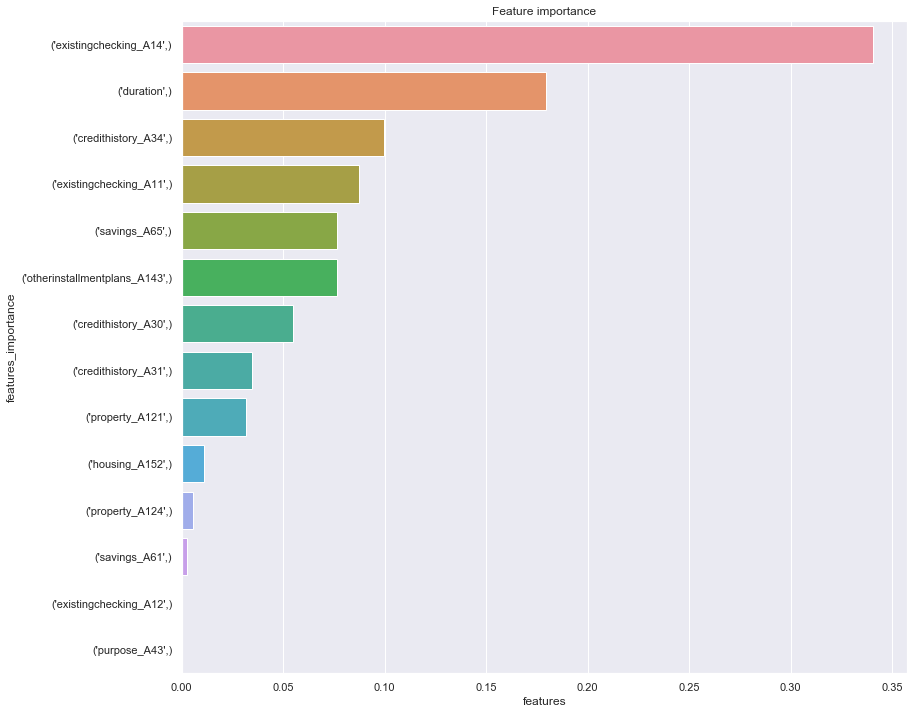

In [91]:
model = tree.DecisionTreeClassifier(max_depth = 5,criterion='gini')
modelfit(model,x_train, y_train,relevant_features,printFeatureImportance=True)

Selected features
Index(['savings_A65', 'existingchecking_A14', 'existingchecking_A11',
       'credithistory_A34', 'credithistory_A30', 'otherinstallmentplans_A143',
       'duration'],
      dtype='object')


(<matplotlib.axes._subplots.AxesSubplot at 0x1cea1c2ae48>,
 Index(['savings_A65', 'existingchecking_A14', 'existingchecking_A11',
        'credithistory_A34', 'credithistory_A30', 'otherinstallmentplans_A143',
        'duration'],
       dtype='object'))

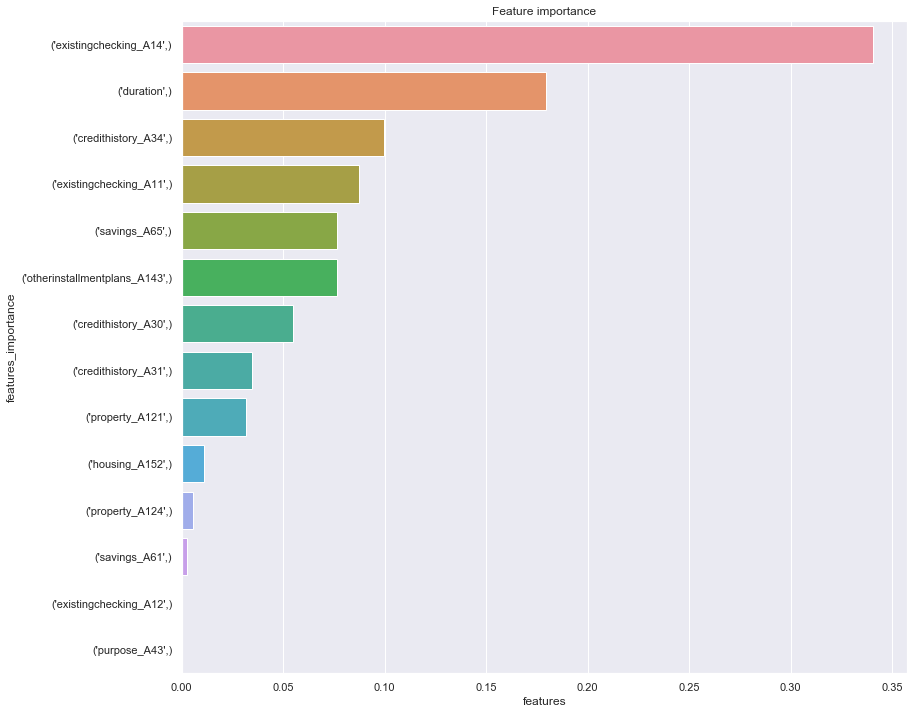

In [93]:
feature_importance(model,relevant_features,0.05,selection=True)

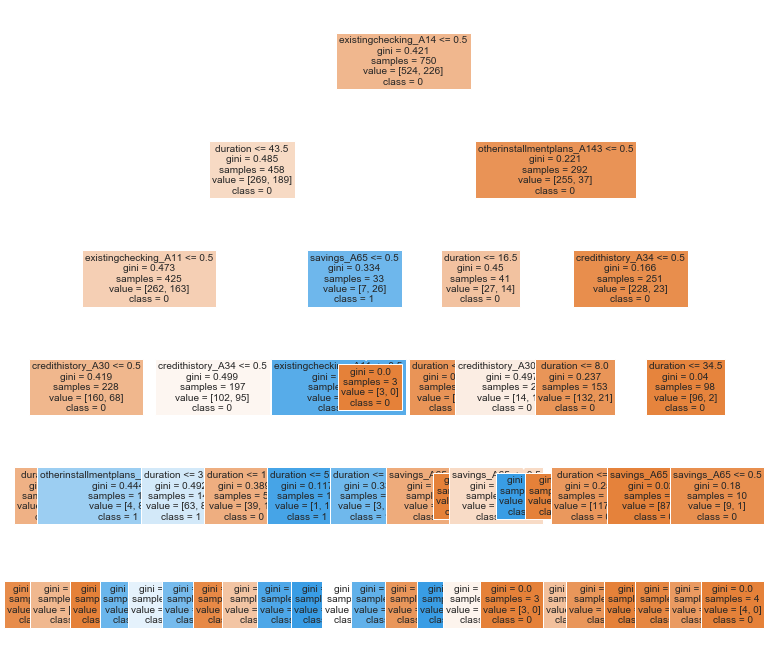

In [134]:
model = tree.DecisionTreeClassifier(max_depth = 5,criterion='gini')
tree_features = ['savings_A65', 'existingchecking_A14', 'existingchecking_A11',
                 'credithistory_A34', 'credithistory_A30', 'otherinstallmentplans_A143','duration']
cn=['0', '1']
clf = model.fit(x_train[tree_features], y_train)
plot_tree(clf, 
          feature_names =tree_features,
          class_names = cn,
          filled=True,fontsize=10)
plt.show()


Model Confusion matrix
[[456  68]
 [109 117]]

Model Report
Accuracy : 0.764
Cross Validation Accuracy: 0.72492 (+/- 0.05)
Cross Validation Precision: 0.56015 (+/- 0.11)
Cross Validation Recall: 0.43043 (+/- 0.12)

Model Confusion matrix
[[165  11]
 [ 45  29]]

Model Report
Accuracy : 0.776
Cross Validation Accuracy: 0.65667 (+/- 0.06)
Cross Validation Precision: 0.52750 (+/- 0.21)
Cross Validation Recall: 0.37679 (+/- 0.18)


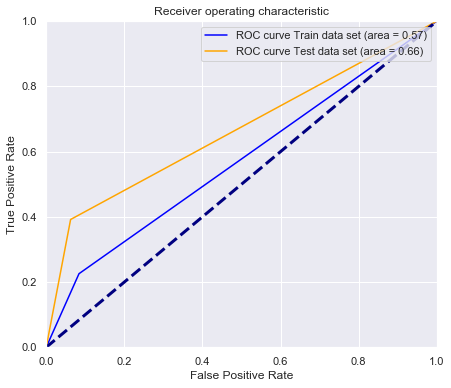

In [143]:
modelfit(model,x_train,y_train,tree_features, printFeatureImportance=False)
modelfit(model,x_test,y_test,tree_features, printFeatureImportance=False)
y_pred = model.predict(x_train[tree_features])
y_pred2 = model.predict(x_test[tree_features])
compute_roc(y_test = y_test, y_pred_test= y_pred2 ,y_train =y_train, y_pred_train = y_pred, plot=True)

##  Gradient Boosting classifier

In [152]:
#Train set validation set 
x= data_clean.drop('classification', axis=1)
y = data_clean['classification']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [193]:
#Train dataset description
y_train.describe()

count    750.000000
mean       0.301333
std        0.459143
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classification, dtype: float64

In [195]:
y_train.value_counts()

0    524
1    226
Name: classification, dtype: int64

In [194]:
#Test dataset description 
y_test.describe()

count    250.000000
mean       0.296000
std        0.457407
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classification, dtype: float64

In [196]:
y_test.value_counts()

0    176
1     74
Name: classification, dtype: int64

In [153]:
GradientBoostingClassifier(random_state=10)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Model Confusion matrix on  train set 
[[510  14]
 [ 73 153]]

Model Confusion matrix on  test set 
[[158  18]
 [ 44  30]]

Model Report 
Accuracy on train set : 0.884
Accuracy on test set : 0.752
Precision on train set : 0.9162
Precision on test set : 0.625
Recall on train set : 0.677
Recall on test set : 0.4054
 cross-validation: evaluate using 10-fold cross validation on the train set 
Cross Validation Accuracy: 0.73493 (+/- 0.04)
Cross Validation Precision: 0.58841 (+/- 0.08)
Cross Validation Recall: 0.47292 (+/- 0.12)


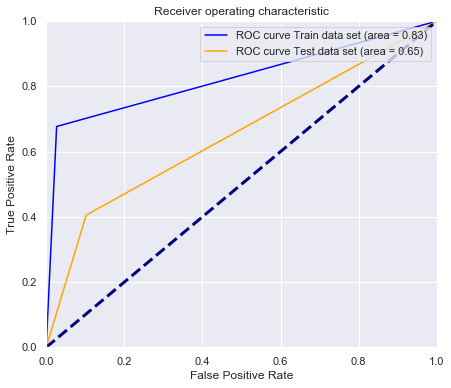

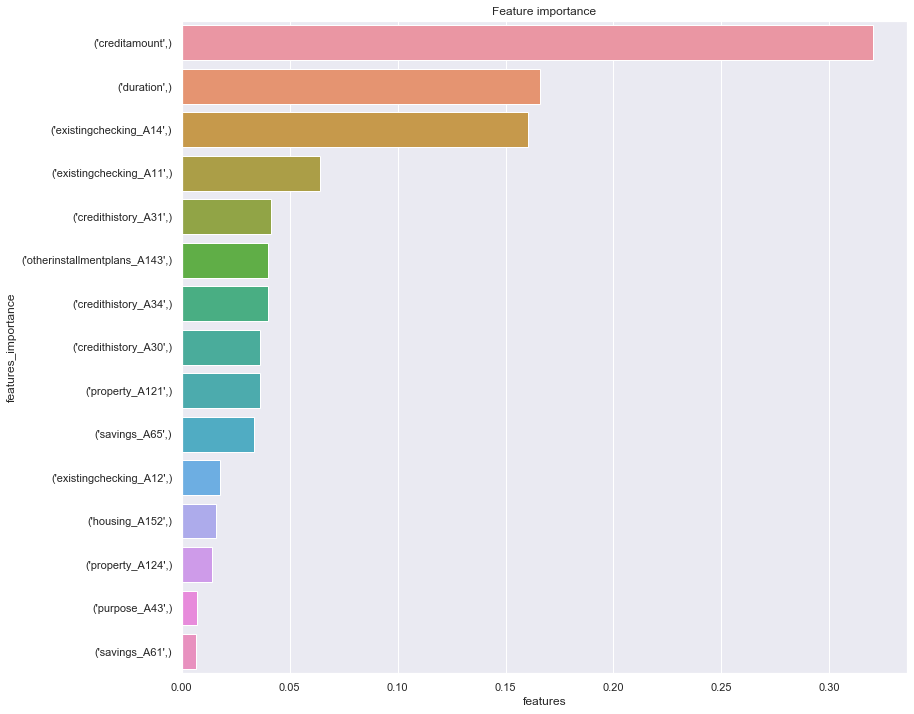

In [159]:
#Baseline Gradient boosting model 
base_gbm = GradientBoostingClassifier(random_state=10)
modelfit(base_gbm,x_train,y_train,x_test,y_test,relevant_features,roc=True,printFeatureImportance=True)


### ***Tunning parameters with Gridsearch***
**Baseline approch**
    
    Fix learning rate and number of estimators for tuning tree-based parameters
    min_samples_split = 500 : This should be ~0.5-1% of total values.
    min_samples_leaf = 50 :  for preventing overfitting and again a small value.
    max_depth = 8 : Should be choosen (5-8) based on the number of observations and predictors.
    max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.
    subsample = 0.8 : commonly used used start value

**we will choose all the relevants features 

In [138]:
print('tuning n_estimators')
params1 = {'n_estimators':range(30,81,10)}

estimator = GradientBoostingClassifier(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)

grid_xgb1 = GridSearchCV(estimator,
                  params1,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=1,
                  verbose=False)

grid_result=grid_xgb1.fit(x_train[relevant_features], y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning n_estimators
Best: 0.737333 using {'n_estimators': 80}
0.698667 (0.016680) with: {'n_estimators': 30}
0.705333 (0.020526) with: {'n_estimators': 40}
0.720000 (0.029402) with: {'n_estimators': 50}
0.729333 (0.025267) with: {'n_estimators': 60}
0.734667 (0.032918) with: {'n_estimators': 70}
0.737333 (0.030318) with: {'n_estimators': 80}


In [139]:
print('tuning max_depth and min_sample_split')
params2 =  {'max_depth':range(5,16,2), 'min_samples_split':range(400,1001,200)}

estimator = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators = 80,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)

grid_xgb2 = GridSearchCV(estimator,
                  params2,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)

grid_result=grid_xgb2.fit(x_train[relevant_features], y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning max_depth and min_sample_split
Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s


Best: 0.754667 using {'max_depth': 5, 'min_samples_split': 400}
0.754667 (0.025520) with: {'max_depth': 5, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_depth': 5, 'min_samples_split': 600}
0.698667 (0.003578) with: {'max_depth': 5, 'min_samples_split': 800}
0.698667 (0.003578) with: {'max_depth': 5, 'min_samples_split': 1000}
0.754667 (0.025520) with: {'max_depth': 7, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_depth': 7, 'min_samples_split': 600}
0.698667 (0.003578) with: {'max_depth': 7, 'min_samples_split': 800}
0.698667 (0.003578) with: {'max_depth': 7, 'min_samples_split': 1000}
0.754667 (0.025520) with: {'max_depth': 9, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_depth': 9, 'min_samples_split': 600}
0.698667 (0.003578) with: {'max_depth': 9, 'min_samples_split': 800}
0.698667 (0.003578) with: {'max_depth': 9, 'min_samples_split': 1000}
0.754667 (0.025520) with: {'max_depth': 11, 'min_samples_split': 400}
0.698667 (0.003578) with: {'max_dep

[Parallel(n_jobs=-1)]: Done 225 out of 240 | elapsed:    6.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [140]:
print('tuning num_sample_split and min_sample_split')
params3 =  {'min_samples_leaf':range(40,70,10), 'min_samples_split':range(400,1001,200)}
estimator = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators = 80,
                                       max_depth=5,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)
grid_xgb3 = GridSearchCV(estimator,
                  params3,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=-1,
                  verbose=True)
grid_result=grid_xgb3.fit(x_train[relevant_features], y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

tuning num_sample_split and min_sample_split
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s


Best: 0.740000 using {'min_samples_leaf': 40, 'min_samples_split': 400}
0.740000 (0.027664) with: {'min_samples_leaf': 40, 'min_samples_split': 400}
0.698667 (0.003578) with: {'min_samples_leaf': 40, 'min_samples_split': 600}
0.698667 (0.003578) with: {'min_samples_leaf': 40, 'min_samples_split': 800}
0.698667 (0.003578) with: {'min_samples_leaf': 40, 'min_samples_split': 1000}
0.734667 (0.022025) with: {'min_samples_leaf': 50, 'min_samples_split': 400}
0.698667 (0.003578) with: {'min_samples_leaf': 50, 'min_samples_split': 600}
0.698667 (0.003578) with: {'min_samples_leaf': 50, 'min_samples_split': 800}
0.698667 (0.003578) with: {'min_samples_leaf': 50, 'min_samples_split': 1000}
0.737333 (0.026399) with: {'min_samples_leaf': 60, 'min_samples_split': 400}
0.698667 (0.003578) with: {'min_samples_leaf': 60, 'min_samples_split': 600}
0.698667 (0.003578) with: {'min_samples_leaf': 60, 'min_samples_split': 800}
0.698667 (0.003578) with: {'min_samples_leaf': 60, 'min_samples_split': 1000}


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [141]:
print('tuning max_features')
params4 =  {'max_features':range(2,len(relevant_features),1)}

estimator = GradientBoostingClassifier(learning_rate=0.1,
                                       n_estimators = 40,
                                       max_depth=5,                                        
                                       min_samples_split=400, 
                                       min_samples_leaf=40, 
                                       subsample=0.8,
                                       random_state=10)
grid_xgb4 = GridSearchCV(estimator,
                  params4,
                  cv=10,
                  scoring='accuracy',
                  n_jobs=1,
                  verbose=True)
grid_result=grid_xgb4.fit(x_train[relevant_features], y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds , params):
     

tuning max_features
Fitting 10 folds for each of 13 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best: 0.736000 using {'max_features': 11}
0.718667 (0.030990) with: {'max_features': 2}
0.720000 (0.025072) with: {'max_features': 3}
0.721333 (0.030335) with: {'max_features': 4}
0.726667 (0.029972) with: {'max_features': 5}
0.729333 (0.032203) with: {'max_features': 6}
0.728000 (0.028263) with: {'max_features': 7}
0.721333 (0.024186) with: {'max_features': 8}
0.733333 (0.028903) with: {'max_features': 9}
0.728000 (0.021730) with: {'max_features': 10}
0.736000 (0.029225) with: {'max_features': 11}
0.734667 (0.027930) with: {'max_features': 12}
0.732000 (0.030405) with: {'max_features': 13}
0.733333 (0.029508) with: {'max_features': 14}


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    3.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [143]:
xgb_tunned = GradientBoostingClassifier(learning_rate=0.1,
                                        n_estimators = 40,
                                        max_depth=5,                         
                                        min_samples_split=400,
                                        min_samples_leaf=40,
                                        subsample=0.8,
                                        max_features= 11,
                                        random_state=10)


Model Confusion matrix on  train set 
[[489  35]
 [148  78]]

Model Confusion matrix on  test set 
[[158  18]
 [ 47  27]]

Model Report 
Accuracy on train set : 0.756
Accuracy on test set : 0.74
Precision on train set : 0.6903
Precision on test set : 0.6
Recall on train set : 0.3451
Recall on test set : 0.3649
 cross-validation: evaluate using 10-fold cross validation on the train set 
Cross Validation Accuracy: 0.72542 (+/- 0.04)
Cross Validation Precision: 0.62200 (+/- 0.20)
Cross Validation Recall: 0.26976 (+/- 0.14)


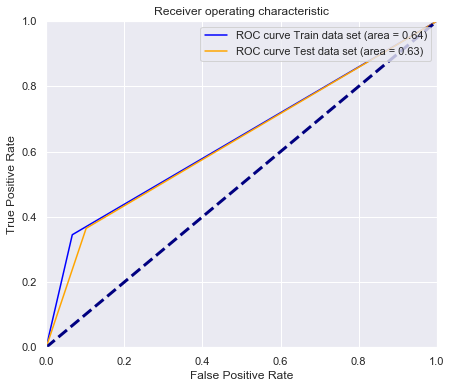

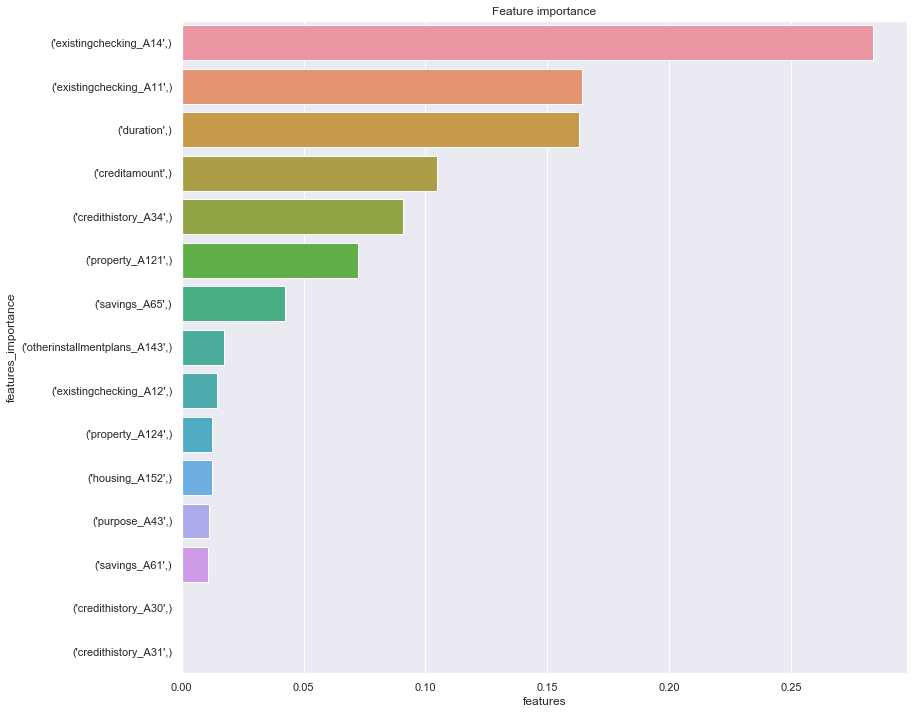

In [160]:
#Fit Cross validation and prediction on the train and the test set
modelfit(xgb_tunned,x_train, y_train, x_test,y_test,relevant_features,performCV=True,roc=True,printFeatureImportance=True)

In [166]:
#Removing the variable with no contribution
xg_features = ['savings_A65',
 'savings_A61',
 'purpose_A43',
 'property_A124',
 'property_A121',
 'existingchecking_A14',
 'existingchecking_A12',
 'existingchecking_A11',
 'credithistory_A34',
 'otherinstallmentplans_A143',
 'housing_A152',
 'duration',
 'creditamount']


Model Confusion matrix on  train set 
[[493  31]
 [147  79]]

Model Confusion matrix on  test set 
[[158  18]
 [ 44  30]]

Model Report 
Accuracy on train set : 0.7627
Accuracy on test set : 0.752
Precision on train set : 0.7182
Precision on test set : 0.625
Recall on train set : 0.3496
Recall on test set : 0.4054
 cross-validation: evaluate using 10-fold cross validation on the train set 
Cross Validation Accuracy: 0.73333 (+/- 0.02)
Cross Validation Precision: 0.66033 (+/- 0.16)
Cross Validation Recall: 0.26522 (+/- 0.09)


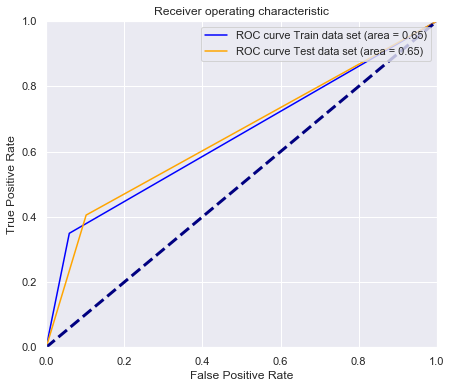

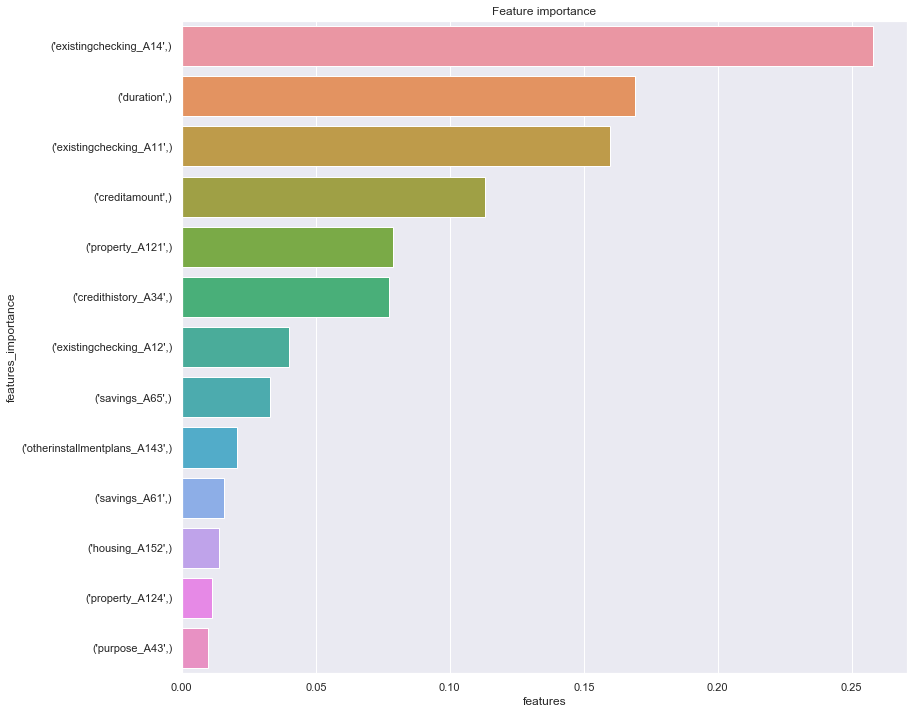

In [167]:
#Fit Cross validation and prediction on the train and the test set
modelfit(xgb_tunned,x_train, y_train, x_test,y_test,xg_features,performCV=True,roc=True,printFeatureImportance=True)

In [431]:
#stastical score and default prediction on theoverall database
xgb_tunned.fit(data_clean[xg_features],data_clean.classification)
predprob = xgb_tunned.predict_proba(data_clean[xg_features])[:,1]
preddef = xgb_tunned.predict(data_clean[xg_features])
real_value =data_clean.classification
export =pd.DataFrame({'client_index': [x for x in range(1,1001)],'Real Default value':real_value, 'Score':predprob, 
                                     'Predicted defalut value':preddef})

In [439]:
export.head(20)

,client_index,Real Default value,Score,Predicted defalut value
1,1,0,0.157051,0
2,2,1,0.578204,1
3,3,0,0.075077,0
4,4,0,0.697651,1
5,5,1,0.631212,1
6,6,0,0.243058,0
7,7,0,0.101163,0
8,8,0,0.536770,1
9,9,0,0.082670,0
10,10,1,0.376221,0


##  LOGISTIC REGRESSION 

In [251]:
LogisticRegression(random_state=10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Model Confusion matrix on  train set 
[[472  52]
 [129  97]]

Model Confusion matrix on  test set 
[[149  27]
 [ 39  35]]

Model Report 
Accuracy on train set : 0.7587
Accuracy on test set : 0.736
Precision on train set : 0.651
Precision on test set : 0.5645
Recall on train set : 0.4292
Recall on test set : 0.473
 cross-validation: evaluate using 10-fold cross validation on the train set 
Cross Validation Accuracy: 0.74683 (+/- 0.05)
Cross Validation Precision: 0.63462 (+/- 0.07)
Cross Validation Recall: 0.41166 (+/- 0.09)


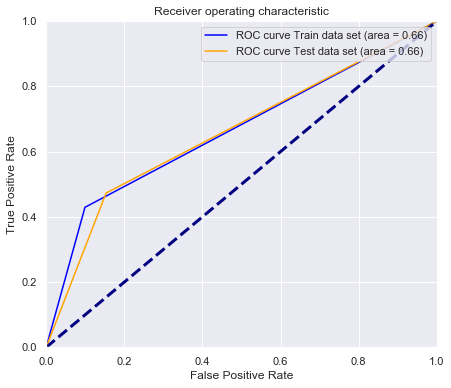

In [258]:
#Fit Cross validation and prediction on the train and the test set
reg = LogisticRegression(random_state = 10,solver ='liblinear')
modelfit(reg,x_train,y_train, x_test,y_test,relevant_features,performCV=True,roc=True,printFeatureImportance=False)

In [359]:
# get importance
importance = reg.coef_[0]
# summarize feature importance
for i in range(len(importance)): 
	print('Feature: %r , Score: %.5f' % (relevant_features[i+1],importance[i]))
feat_imp=pd.DataFrame({'Feature':relevant_features,'score': importance})
feat_imp["relative_imp"] = abs(feat_imp.score)/sum(abs(feat_imp.score))
feat_imp

Feature: 'savings_A65' , Score: -0.75775
Feature: 'savings_A61' , Score: 0.11306
Feature: 'purpose_A43' , Score: -0.26039
Feature: 'property_A124' , Score: -0.00289
Feature: 'property_A121' , Score: -0.67418
Feature: 'existingchecking_A14' , Score: -0.75375
Feature: 'existingchecking_A12' , Score: 0.41458
Feature: 'existingchecking_A11' , Score: 0.89764
Feature: 'credithistory_A34' , Score: -0.72571
Feature: 'credithistory_A31' , Score: 0.81699
Feature: 'credithistory_A30' , Score: 0.96490
Feature: 'otherinstallmentplans_A143' , Score: -0.31485
Feature: 'housing_A152' , Score: -0.29710
Feature: 'duration' , Score: 0.03166
Feature: 'creditamount' , Score: -0.00001


,Feature,score,relative_imp
1,savings_A65,-0.757751,0.107858
2,savings_A61,0.113056,0.016092
3,purpose_A43,-0.260394,0.037064
4,property_A124,-0.002893,0.000412
5,property_A121,-0.674177,0.095962
6,existingchecking_A14,-0.753754,0.107289
7,existingchecking_A12,0.414576,0.059010
8,existingchecking_A11,0.897637,0.127769
9,credithistory_A34,-0.725711,0.103297
10,credithistory_A31,0.816994,0.116290


In [361]:
sum(feat_imp.relative_imp)

1.0

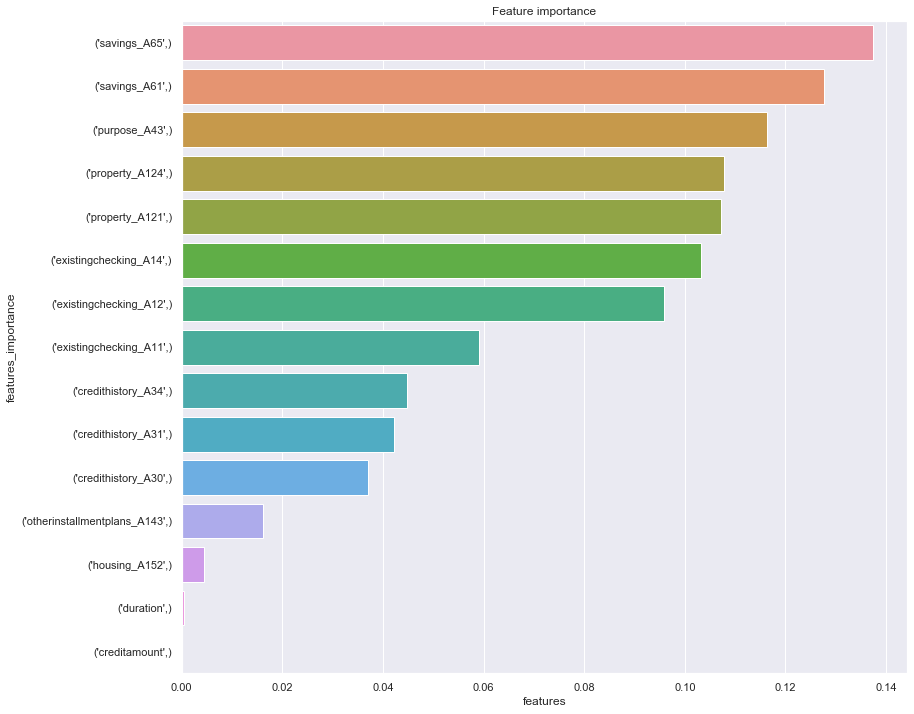

In [363]:
feature_plot = pd.DataFrame(feat_imp["relative_imp"]).sort_values(by="relative_imp", ascending = False).T
feature_plot.columns = [relevant_features]
sns.set(rc={'figure.figsize':(13,12)})
fig = sns.bar plot(data=feature_plot,orient ="h")
fig.set(title = 'Feature importance', xlabel = 'features', ylabel = 'features_importance' )
fig

In [367]:
#Dropping 'creditamount' from relevant features's list
log_features =relevant_features.drop(15)
log_features

1                    savings_A65
2                    savings_A61
3                    purpose_A43
4                  property_A124
5                  property_A121
6           existingchecking_A14
7           existingchecking_A12
8           existingchecking_A11
9              credithistory_A34
10             credithistory_A31
11             credithistory_A30
12    otherinstallmentplans_A143
13                  housing_A152
14                      duration
Name: Feature, dtype: object


Model Confusion matrix on  train set 
[[473  51]
 [128  98]]

Model Confusion matrix on  test set 
[[149  27]
 [ 40  34]]

Model Report 
Accuracy on train set : 0.7613
Accuracy on test set : 0.732
Precision on train set : 0.6577
Precision on test set : 0.5574
Recall on train set : 0.4336
Recall on test set : 0.4595
 cross-validation: evaluate using 10-fold cross validation on the train set 
Cross Validation Accuracy: 0.74793 (+/- 0.03)
Cross Validation Precision: 0.61984 (+/- 0.12)
Cross Validation Recall: 0.40138 (+/- 0.12)


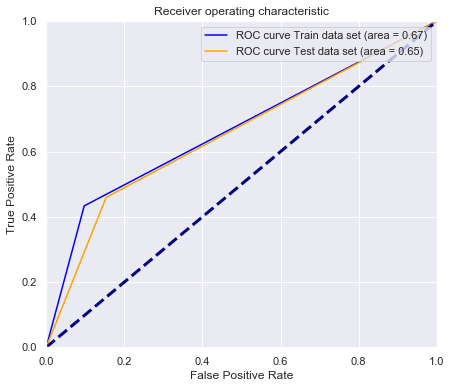

In [368]:
#Implementation of the logistic regression on selected feature's list
modelfit(reg,x_train,y_train, x_test,y_test,log_features,performCV=True,roc=True,printFeatureImportance=False)

Feature: 'savings_A65' , Score: -0.72043
Feature: 'savings_A61' , Score: 0.14971
Feature: 'purpose_A43' , Score: -0.25221
Feature: 'property_A124' , Score: 0.00678
Feature: 'property_A121' , Score: -0.68204
Feature: 'existingchecking_A14' , Score: -0.67572
Feature: 'existingchecking_A12' , Score: 0.51875
Feature: 'existingchecking_A11' , Score: 0.98373
Feature: 'credithistory_A34' , Score: -0.74412
Feature: 'credithistory_A31' , Score: 0.80327
Feature: 'credithistory_A30' , Score: 0.92214
Feature: 'otherinstallmentplans_A143' , Score: -0.30536
Feature: 'housing_A152' , Score: -0.28394
Feature: 'duration' , Score: 0.03073


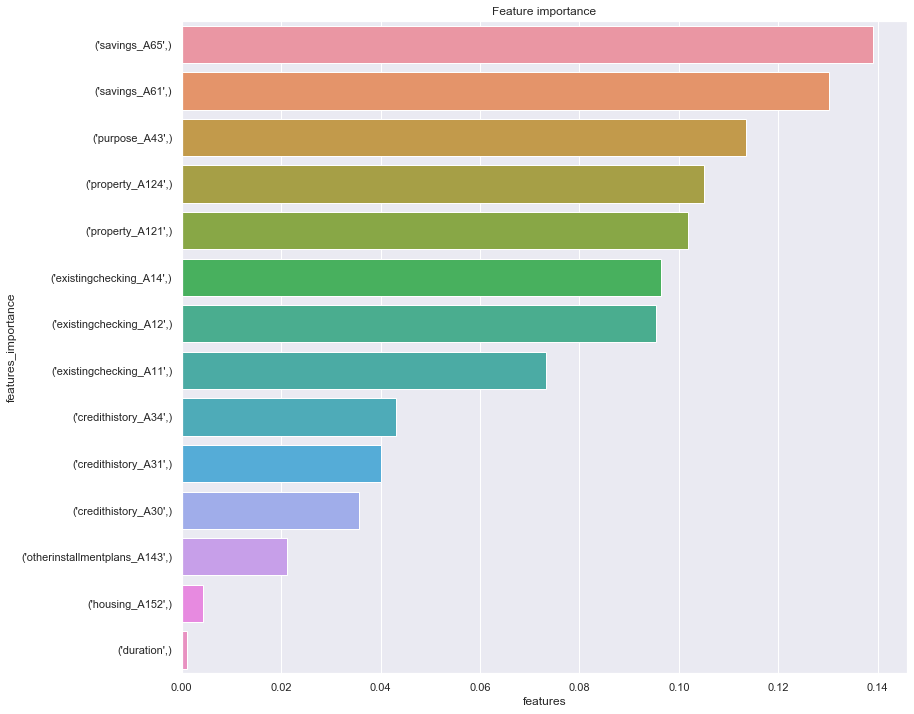

In [371]:
# get importance 
importance = reg.coef_[0]
# summarize feature importance
for i in range(len(importance)): 
	print('Feature: %r , Score: %.5f' % (log_features[i+1],importance[i]))
feat_imp=pd.DataFrame({'Feature':log_features,'score': importance})
feat_imp["relative_imp"] = abs(feat_imp.score)/sum(abs(feat_imp.score))
feat_imp
feature_plot = pd.DataFrame(feat_imp["relative_imp"]).sort_values(by="relative_imp", ascending = False).T
feature_plot.columns = [log_features]
sns.set(rc={'figure.figsize':(13,12)})
fig = sns.barplot(data=feature_plot,orient ="h")
fig.set(title = 'Feature importance', xlabel = 'features', ylabel = 'features_importance' )
fig

In [434]:
#stastical score and default prediction on theoverall database with logisitc regression
reg.fit(data_clean[log_features],data_clean.classification)
predprob = reg.predict_proba(data_clean[log_features])[:,1]
preddef = reg.predict(data_clean[log_features])

In [435]:
log_export =pd.DataFrame({'client_index': [x for x in range(1,1001)],'Real Default value':export["Real Default value"],
                          'Score':predprob, 'Predicted defalut value':preddef})
log_export

,client_index,Real Default value,Score,Predicted defalut value
1,1,0,0.069161,0
2,2,1,0.496630,0
3,3,0,0.055294,0
4,4,0,0.751580,1
5,5,1,0.640906,1
...,...,...,...,...
996,996,0,0.105594,0
997,997,0,0.594667,1
998,998,0,0.103045,0
999,999,1,0.716603,1


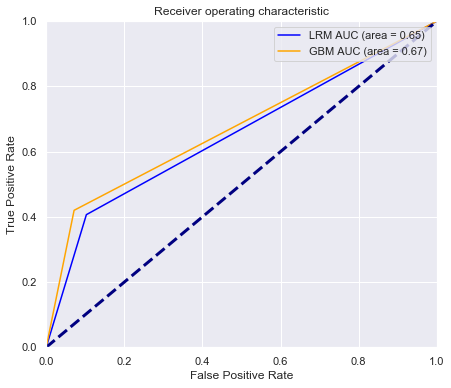

In [438]:
#ROC Curve of the GBM and LogReg
fpr_lrm = dict()
tpr_lrm = dict()
auc_score_lrm = dict()   
fpr_lrm, tpr_lrm, _ = roc_curve(log_export["Real Default value"],log_export["Predicted defalut value"])
auc_score_lrm = auc(fpr_lrm, tpr_lrm)

fpr_gbm = dict()
tpr_gbmm = dict()
auc_score_gbm = dict()   
fpr_gbm, tpr_gbm, _ = roc_curve(export["Real Default value"],export["Predicted defalut value"])
auc_score_gbm = auc(fpr_gbm, tpr_gbm)

plt.figure(figsize=(7, 6))

plt.plot(fpr_lrm, tpr_lrm, color='blue',
         label='LRM AUC (area = %0.2f)' % auc_score_lrm)

plt.plot(fpr_gbm, tpr_gbm, color='orange',
         label='GBM AUC (area = %0.2f)' % auc_score_gbm)

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.legend(loc="upper right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()
